<a href="https://colab.research.google.com/github/Hebabeg/mlprojects/blob/main/PIMA_EDA/PIMA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training and testing Decision Tree, KNN and Logistic Regression (with and without SMOTE) on PIMA Diabetes Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [ ]:
df = pd.read_csv(path + "/diabetes.csv")

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

###The data is imbalanced biased towards young people and women in particular.

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

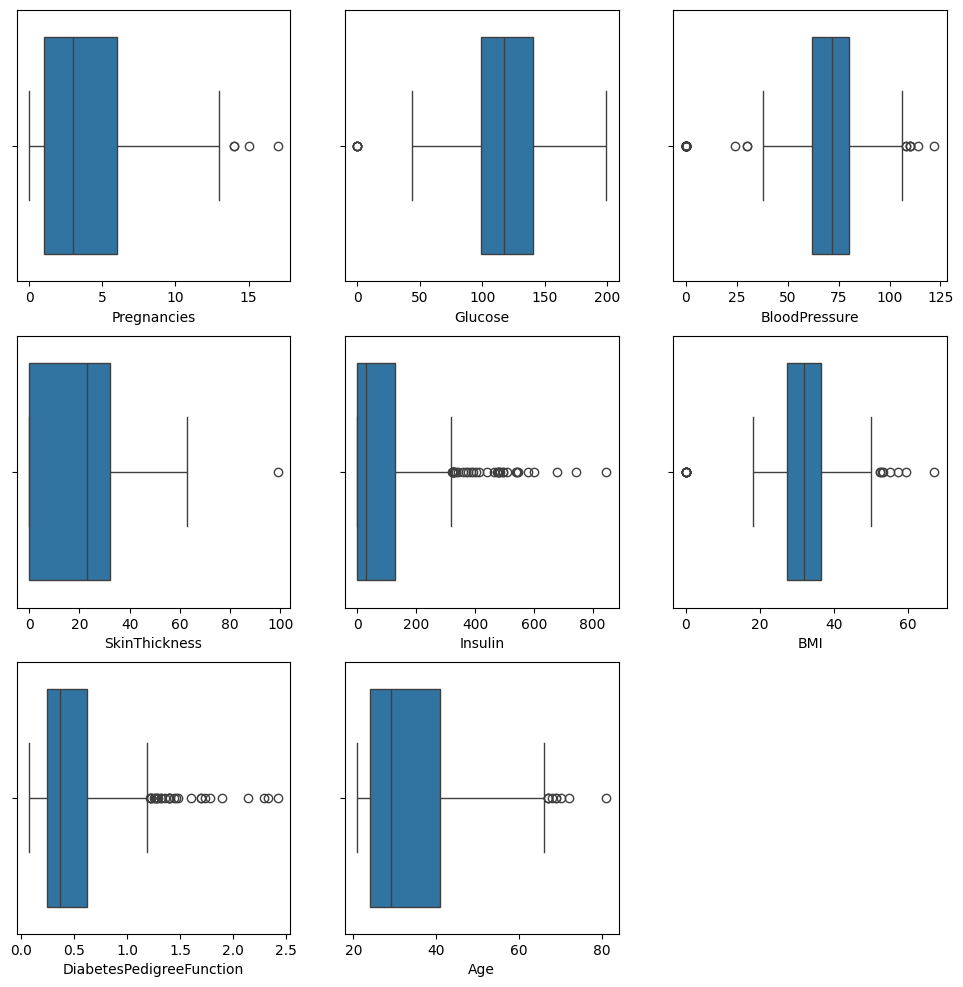

In [ ]:
plt.figure(figsize = (12,12))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3, 3,i+1)
    sns.boxplot(x= col, data = df)
plt.show()

### There are quite a few outliers in the data - for instance: a regular patient wouldn't have 15 pregnancies or BloodPressure = 0 or Glucose or BMI = 0 and so on.

Box Plot:
The central rectangle represents the 25th to 75th percentile (e.g., Interquartile range for Glucose is 100-145
the lines extending from this rectangle (Whiskers) represent the range of 1.5IQR values.
The overall range of values for Glucose is between 50-200
THe circle on the graph (Outliers) can be seen in case of Pregnancies where there are a couple above 15 (which is most likely an error)
As for the central line in each rectangle, that's is the median, e.g., the median age from the dataset is ~30

Box plots are great when comparing distributions of many sets of values. However, they are not ideal incase of Bimodal distributions e.g., in case the data is clustered - lumped across different levels and not the regular Gaussian or Normal distributions (values clustered around the median)
A good alternate might be frequency heatmaps.

In [ ]:
df.columns = df.columns.str.lower()
df.columns
df['skin_thickness'] = df['skinthickness']
df['diabetes_pedigree_function'] = df['diabetespedigreefunction']
df['blood_pressure'] = df['bloodpressure']
df.columns
df.drop(['skinthickness', 'diabetespedigreefunction', 'bloodpressure'], axis = 1, inplace = True)

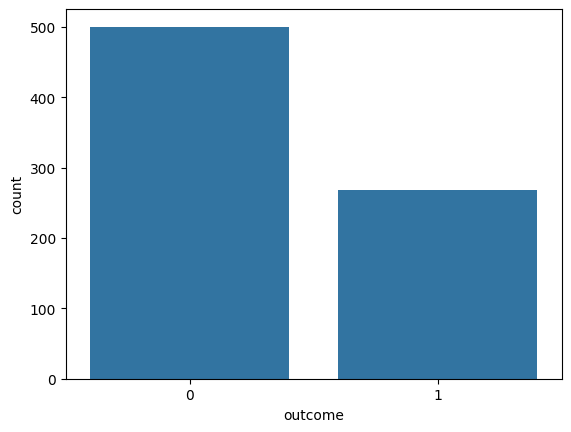

In [ ]:
sns.countplot(x = 'outcome', data = df)
plt.show()



0 --> non - diabetic patients

1 --> diabetic patients

In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'insulin', 'bmi', 'age', 'outcome',
       'skin_thickness', 'diabetes_pedigree_function', 'blood_pressure'],
      dtype='object')

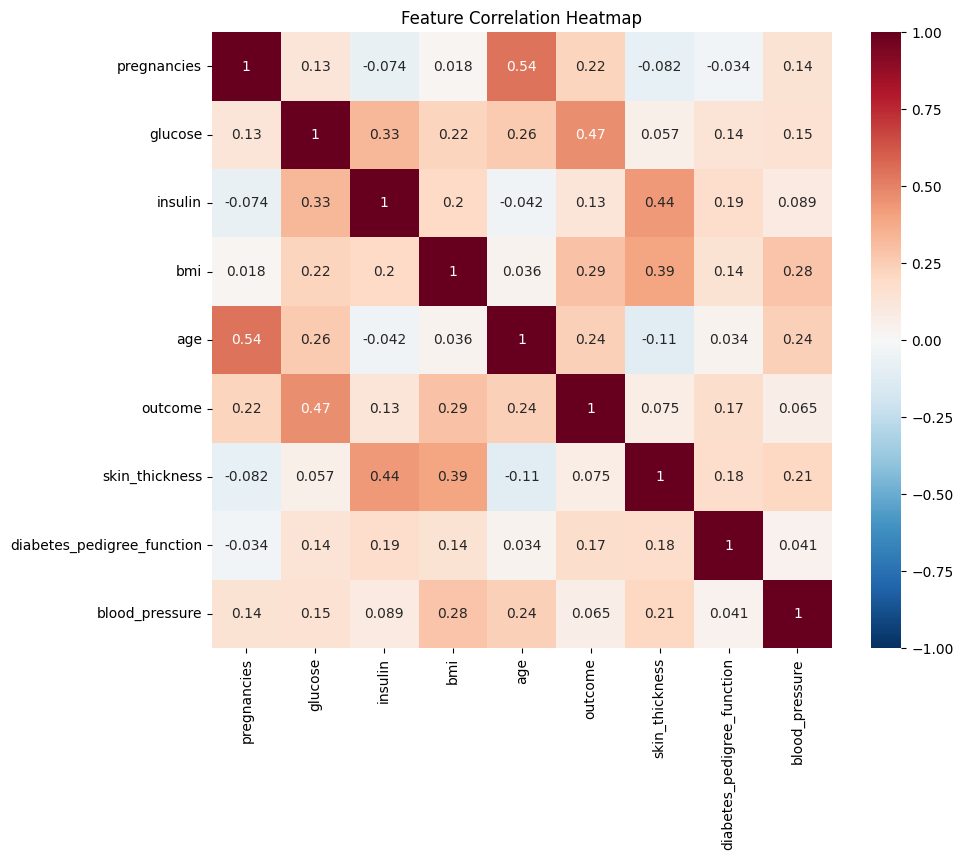

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, center = 0, vmin = -1.0, cmap='RdBu_r')
plt.title('Feature Correlation Heatmap')
plt.show()


The correlation heatmap matrix (built on Pearson correlation coefficient) helps understand the relation between different features:
1. Glucose and BloodPressure have a positive correlation (0.15) - as the glucose increases blood pressure of the patient tends to increase as well. Also Insulin and Glucose also have a positive correlation (0.32) - both these cases are a representation of weak to moderate correlation.
Skin thickness and insulin, age and pregnancies have a strong positive correlation
2. Pregnancies and insulin have a negative correlation (-0.08) -> Insulin dips when a person has been through more pregnancies.
Similarly, age and skin thickness have a (-0.11) correlation.
The map is particularly important in case of
Feature Selection (there might be overlap in information when choosing strongly correlated features, e.g., insulin and skin thickness)

In [ ]:
# plt.figure(figsize=(12, 12))
# for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
#                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
#     plt.subplot(3, 3, i + 1)
#     sns.boxplot(x=col, data=df, showmeans=True,
#                 meanline=True, flierprops=dict(marker='o', color='red', markersize=5),
#                 whiskerprops=dict(color="black", linewidth=2),
#                 boxprops=dict(color="cyan", linewidth=1.5))
#     plt.title(f'{col} Distribution')
# plt.tight_layout()
# plt.show()


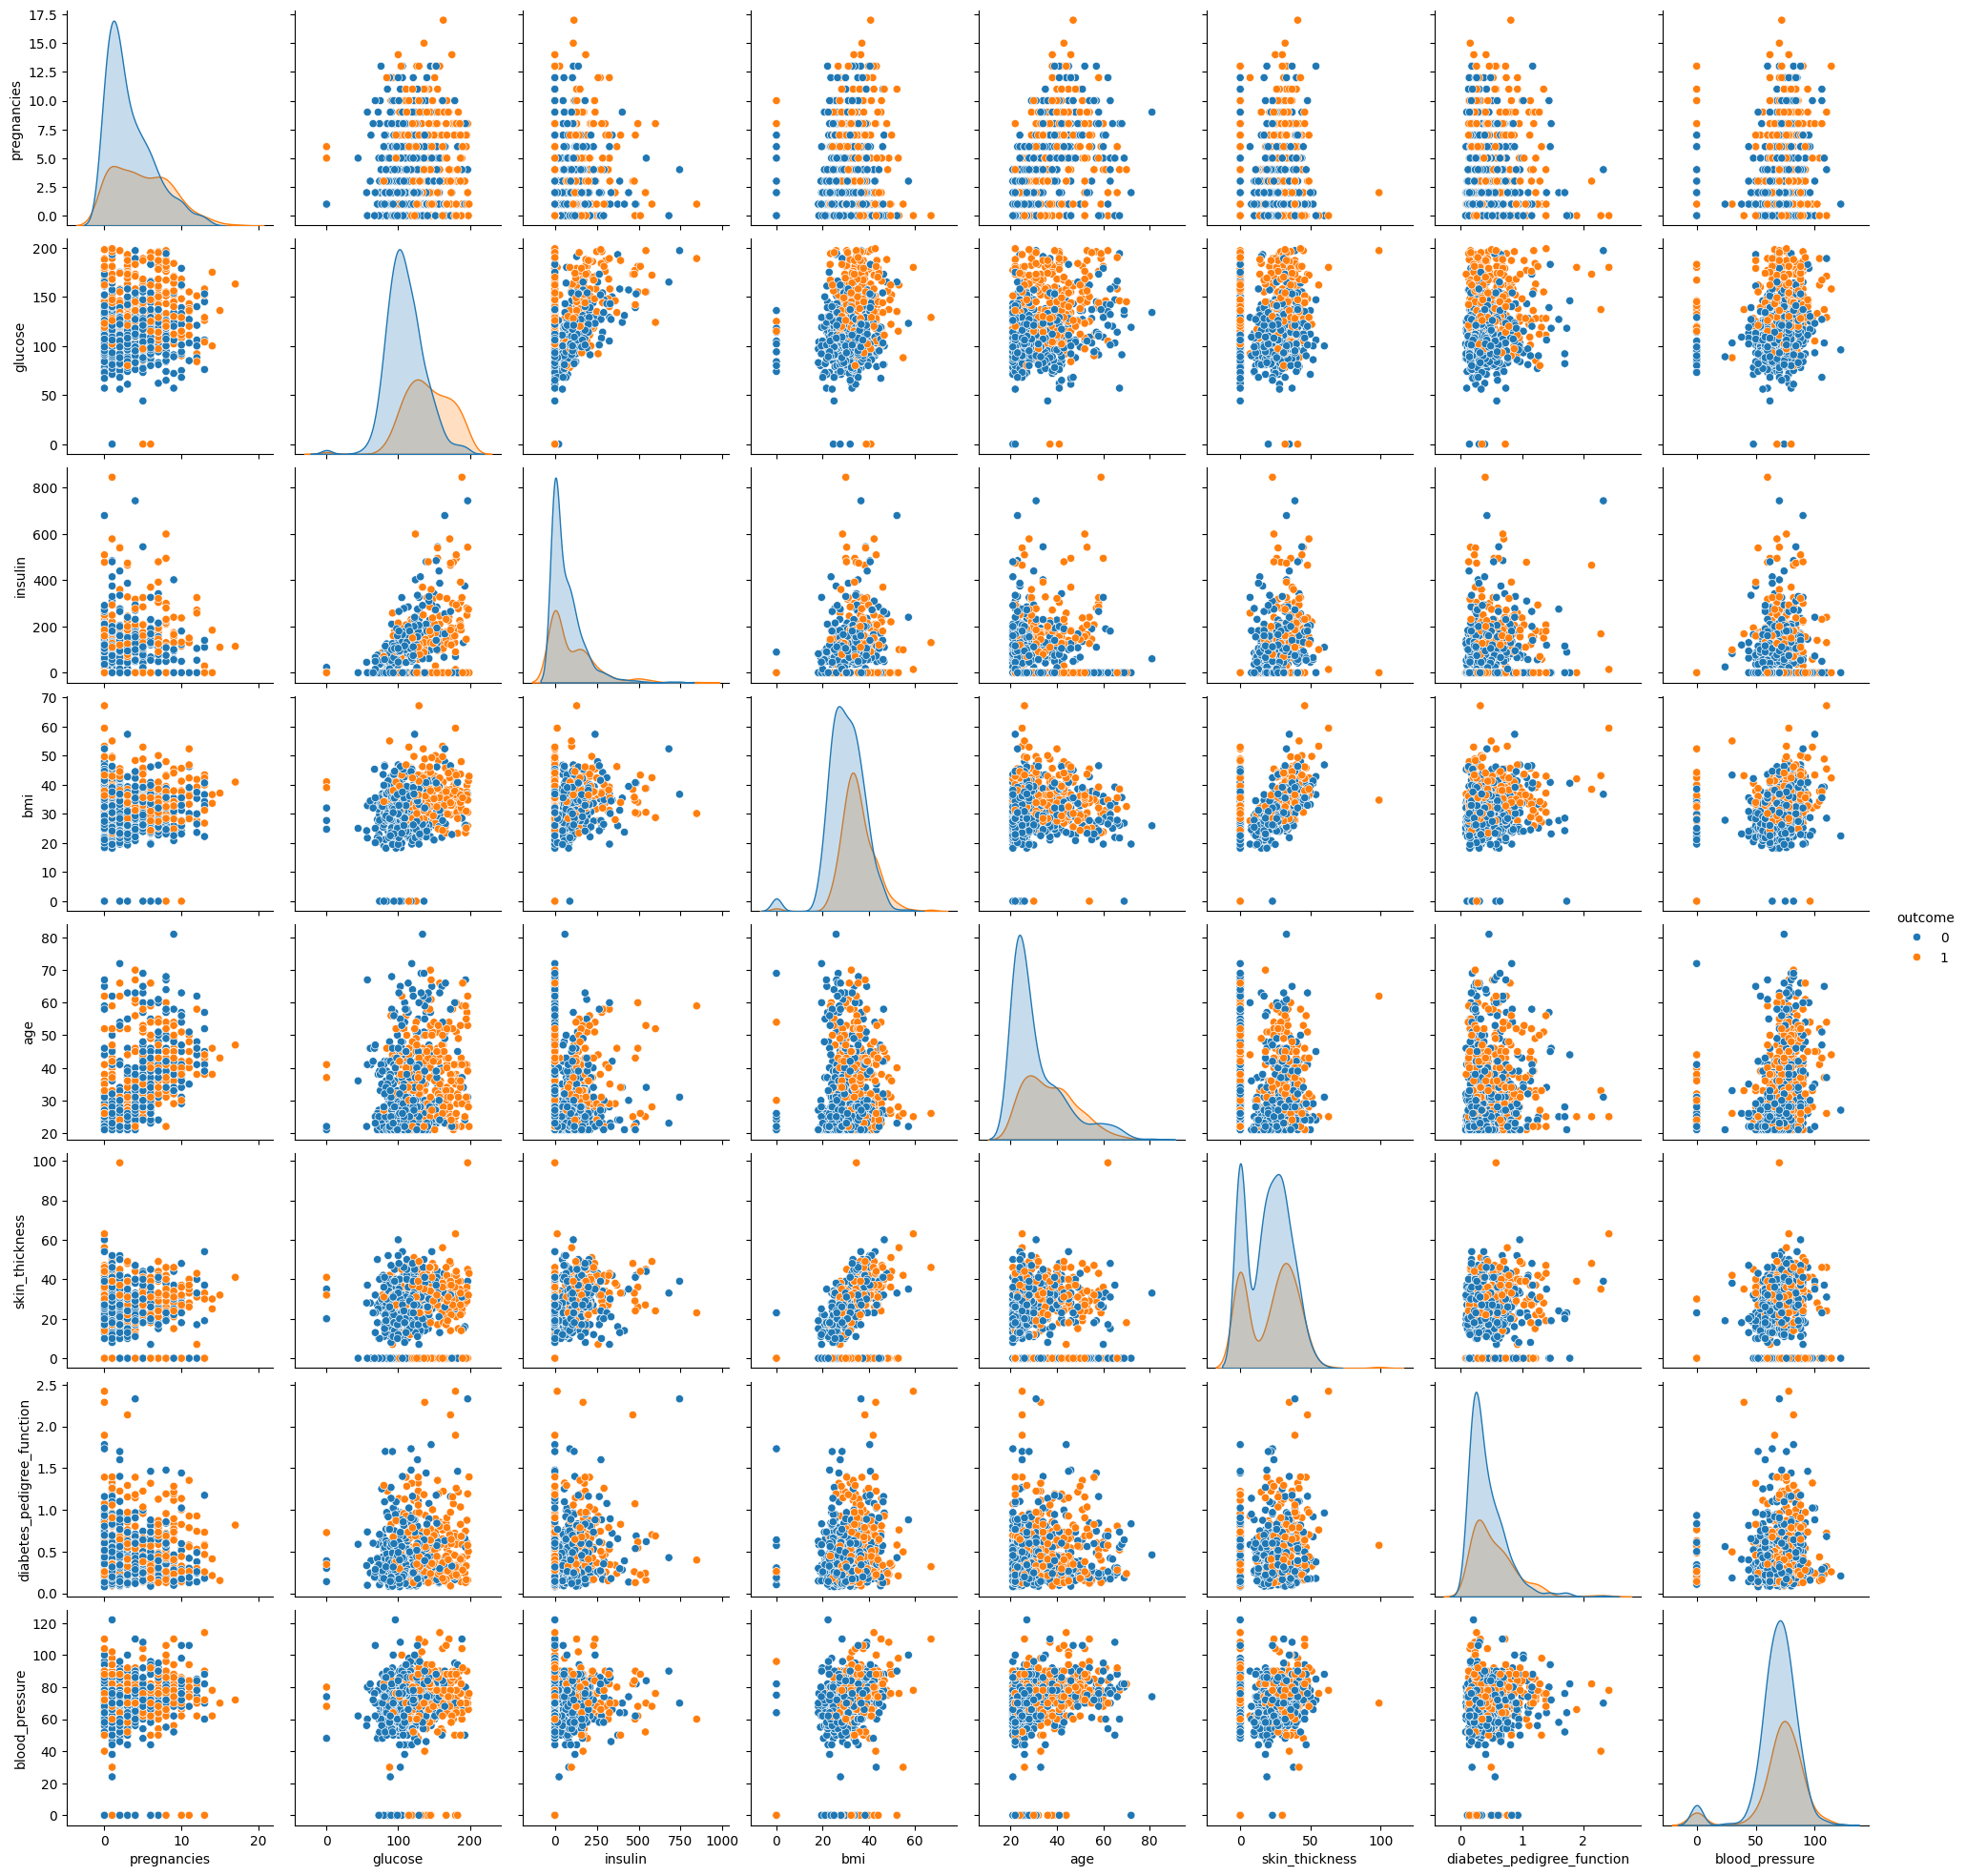

In [ ]:
sns.pairplot(df, hue = 'outcome')
plt.show()

## A closer look at the features that seem to have some correlation:

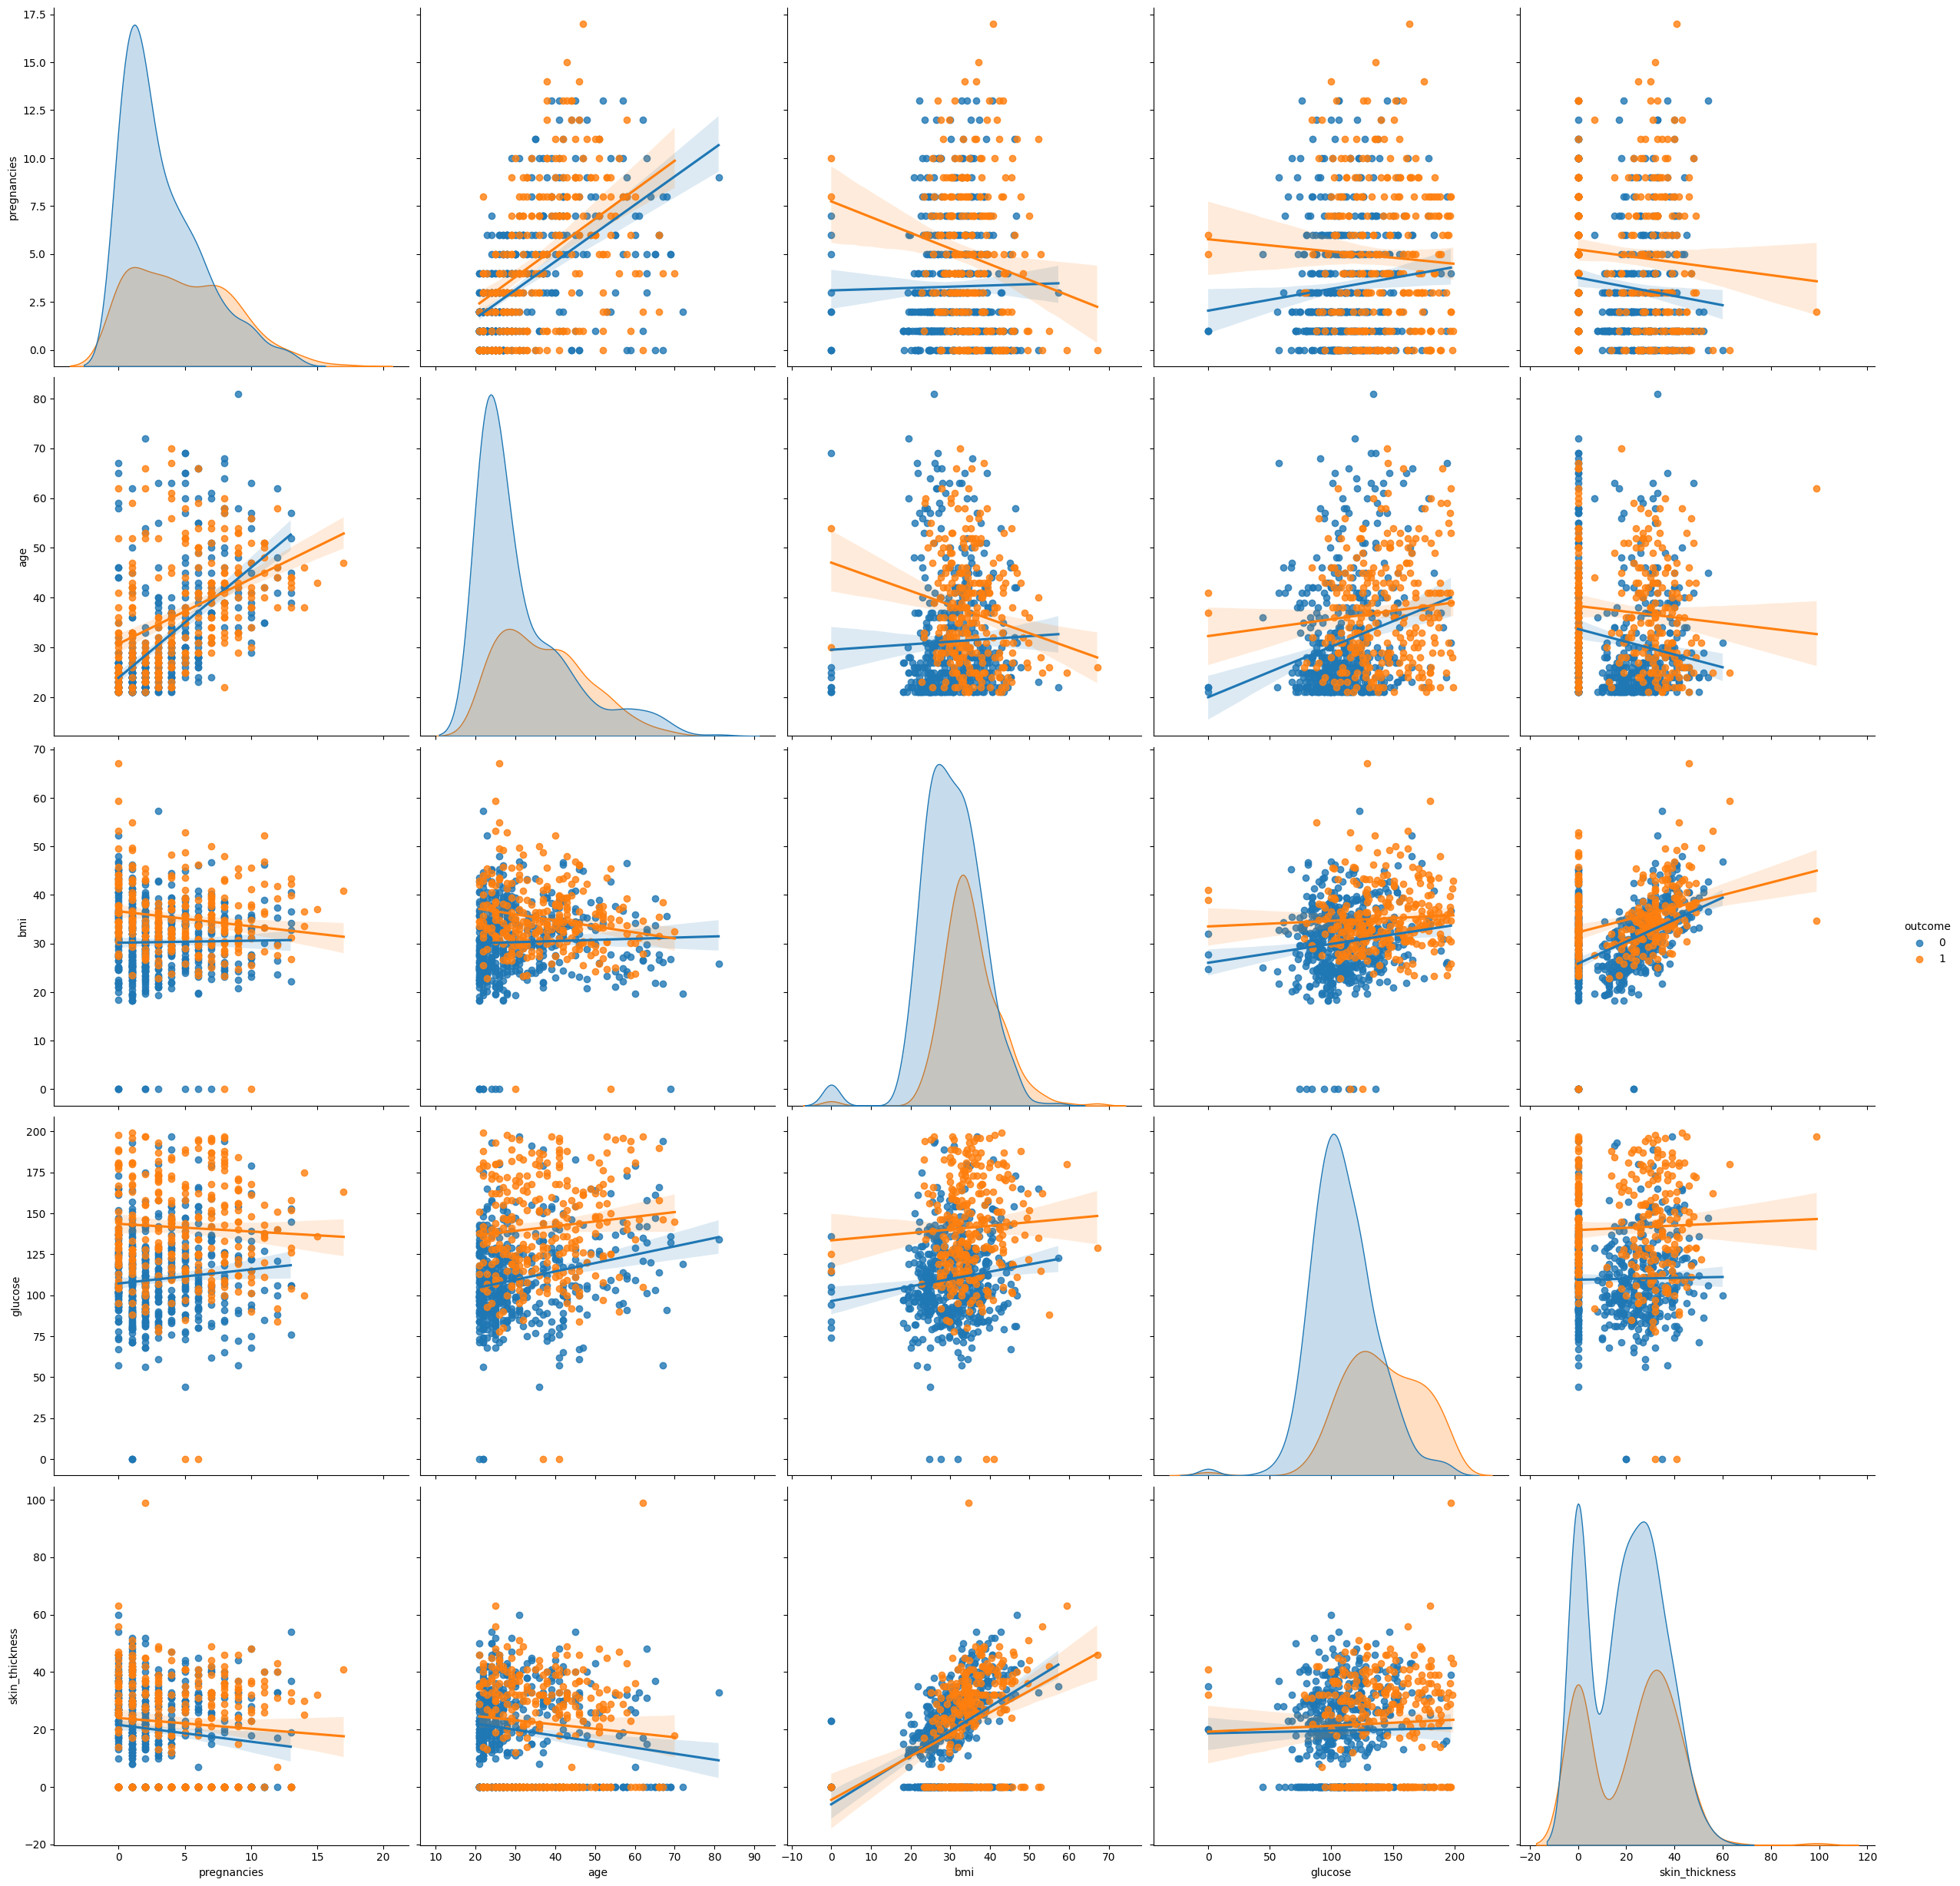

In [ ]:
sns.pairplot(df, hue = 'outcome', vars = ['pregnancies', 'age', 'bmi', 'glucose','skin_thickness'], kind = "reg",  height = 5, aspect = 1)
plt.show()

1. the diagonal plots are density plots representing the distribution of each kernel.
2. Off diagonal plots are scatter plots with regression lines showing the relation between two features.
Ex: Age and BMI have a negative correlation when the patient is diabetic whereas a weak positive in case of a non-diabetic person.
BMI and Skin Thickness have a positive relation regardless of whether the person is diabetic or non-diabetic.

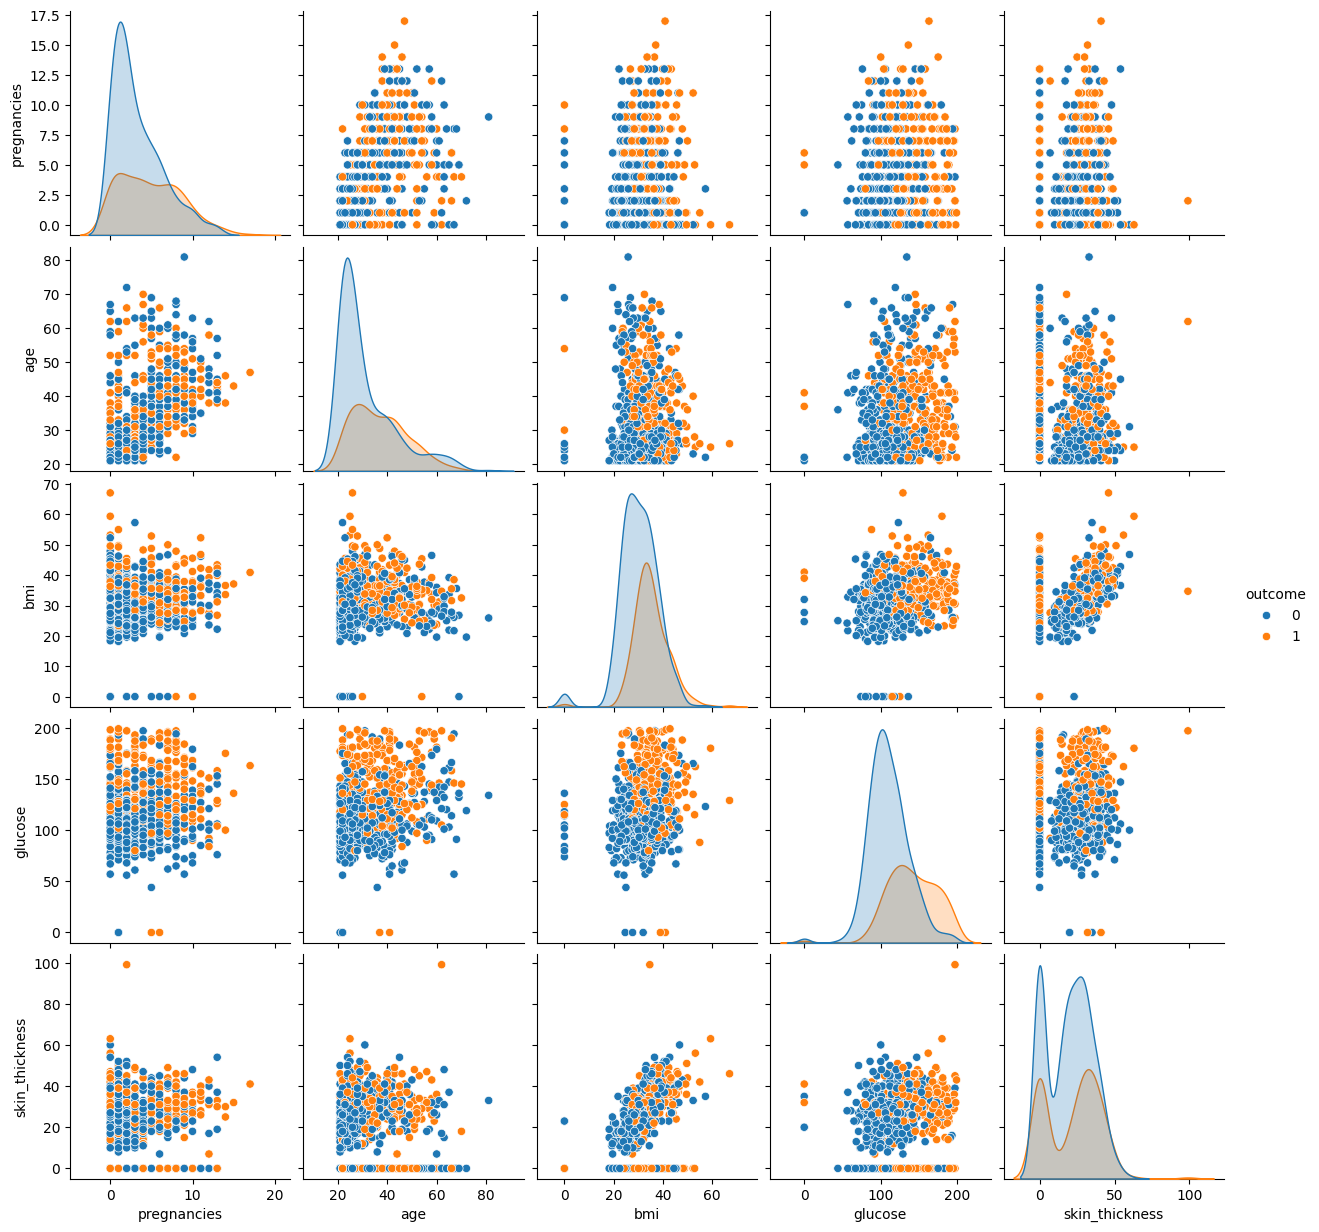

In [ ]:
sns.pairplot(df, hue='outcome', vars = ['pregnancies', 'age', 'bmi', 'glucose','skin_thickness'])

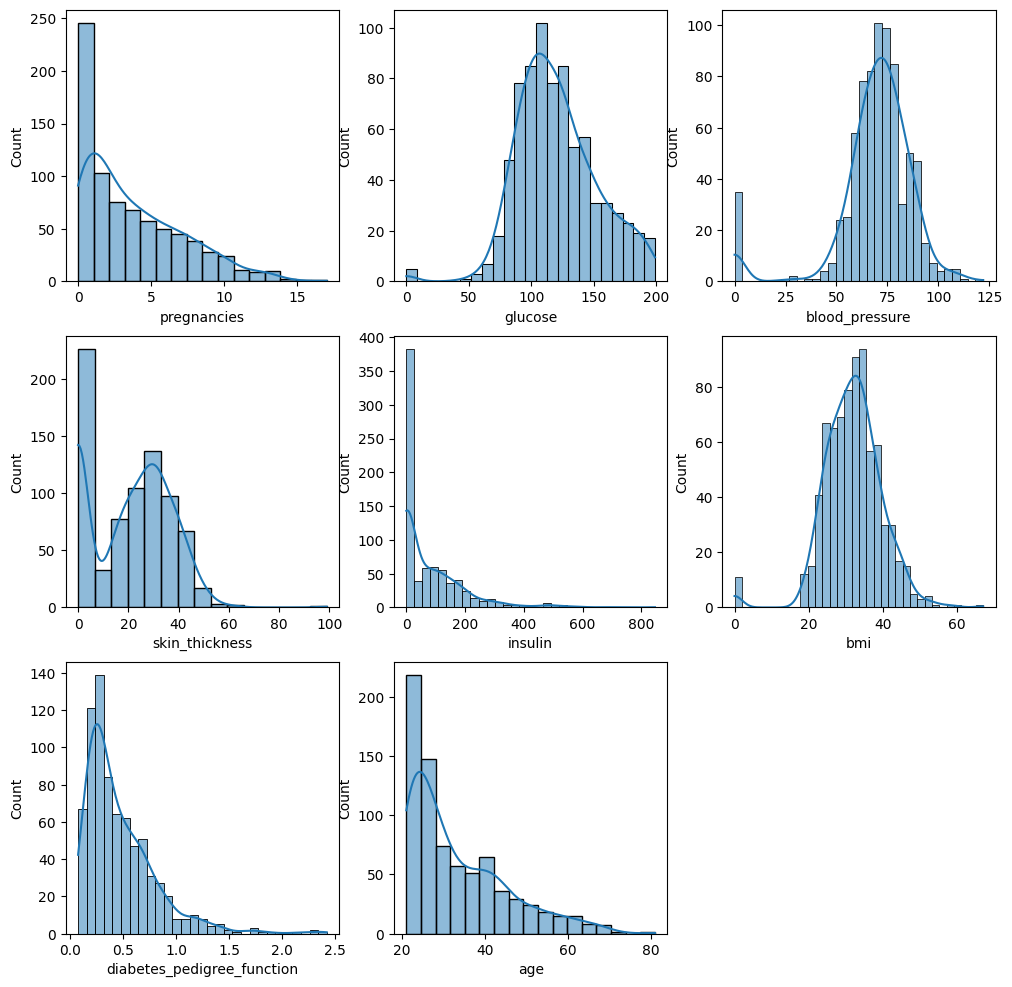

In [ ]:
plt.figure(figsize = (12,12))
for i, col in enumerate(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                         'insulin', 'bmi', 'diabetes_pedigree_function', 'age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x = col, data = df, kde = True)
plt.show()

If we observe the graphs we can infer:
1. 10-15 pregnancies are not the norm, infact they are pretty rara (might be errors)
2. Same goes for 0 blood pressure or glucose which again isn't normal so it can be an error.

Standard Scaling and Label Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
sc_x = StandardScaler()
X = pd.DataFrame(sc_x.fit_transform(df.drop('outcome', axis = 1)), columns = df.drop('outcome', axis = 1).columns)


In [ ]:
df['diabete_pedigree_function'] = np.log1p(df['diabetes_pedigree_function'])
df['insulin'] = np.log1p(df['insulin'])

In [ ]:
X.head()

pregnancies   glucose   insulin       bmi       age  skin_thickness  \
0     0.639947  0.848324 -0.692891  0.204013  1.425995        0.907270   
1    -0.844885 -1.123396 -0.692891 -0.684422 -0.190672        0.530902   
2     1.233880  1.943724 -0.692891 -1.103255 -0.105584       -1.288212   
3    -0.844885 -0.998208  0.123302 -0.494043 -1.041549        0.154533   
4    -1.141852  0.504055  0.765836  1.409746 -0.020496        0.907270   

   diabetes_pedigree_function  blood_pressure  
0                    0.468492        0.149641  
1                   -0.365061       -0.160546  
2                    0.604397       -0.263941  
3                   -0.920763       -0.160546  
4                    5.484909       -1.504687

In [ ]:
y = df['outcome']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate (train_scores) if v == max_train_score]
print("Max Train Score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max Train Score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate (test_scores) if v == max_test_score]
print("Max Test Score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max Test Score 79.6875 % and k = [10]


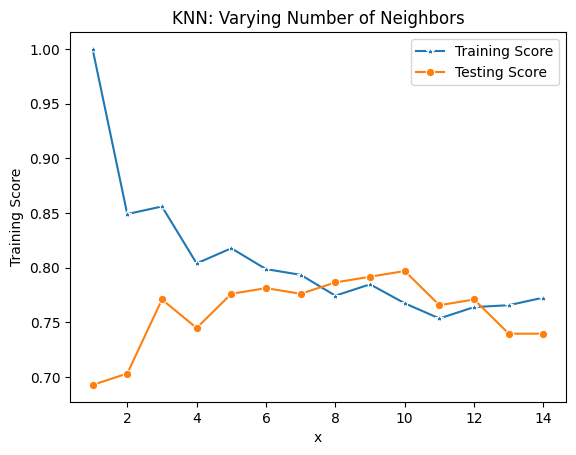

In [ ]:
df_plot = pd.DataFrame({'x': range(1, 15),
                       'Training Score': train_scores,
                       'Testing Score': test_scores})

sns.lineplot(x='x', y='Training Score', data=df_plot, marker='*', label='Training Score')
sns.lineplot(x='x', y='Testing Score', data=df_plot, marker='o', label='Testing Score')

plt.title('KNN: Varying Number of Neighbors')
plt.show()


For k = 10 the model has the highest testing score which means we can use this to create our model.

KNN Classifier

In [ ]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.796875

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[114,  10],
       [ 29,  39]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       124
           1       0.80      0.57      0.67        68

    accuracy                           0.80       192
   macro avg       0.80      0.75      0.76       192
weighted avg       0.80      0.80      0.79       192



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

y_pred2 = clf.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[90, 34],
       [20, 48]])

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       124
           1       0.59      0.71      0.64        68

    accuracy                           0.72       192
   macro avg       0.70      0.72      0.70       192
weighted avg       0.74      0.72      0.72       192



In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42, max_iter = 1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
confusion_matrix(y_test, y_pred_log)


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)


y_pred_smote = logreg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_smote))


Confusion Matrix:
[[120  30]
 [ 25  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       150
           1       0.65      0.69      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231


Accuracy Score:
0.7619047619047619


Based on the results, KNN outperformed Logistic regression and Decision Tree Classsifiers in terms of Accuracy and predicting whether a patient has diabetes or not

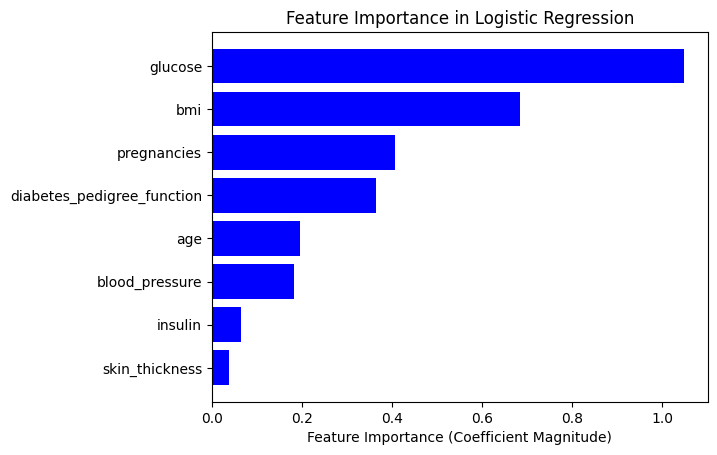

In [ ]:
# feature_names = X.columns
# coefficients = log_reg.coef_[0]
# importance = np.abs(coefficients)


# sorted_indices = np.argsort(importance)
# plt.barh(feature_names[sorted_indices], importance[sorted_indices], color='blue')
# plt.xlabel("Feature Importance (Coefficient Magnitude)")
# plt.title("Feature Importance in Logistic Regression")
# plt.show()




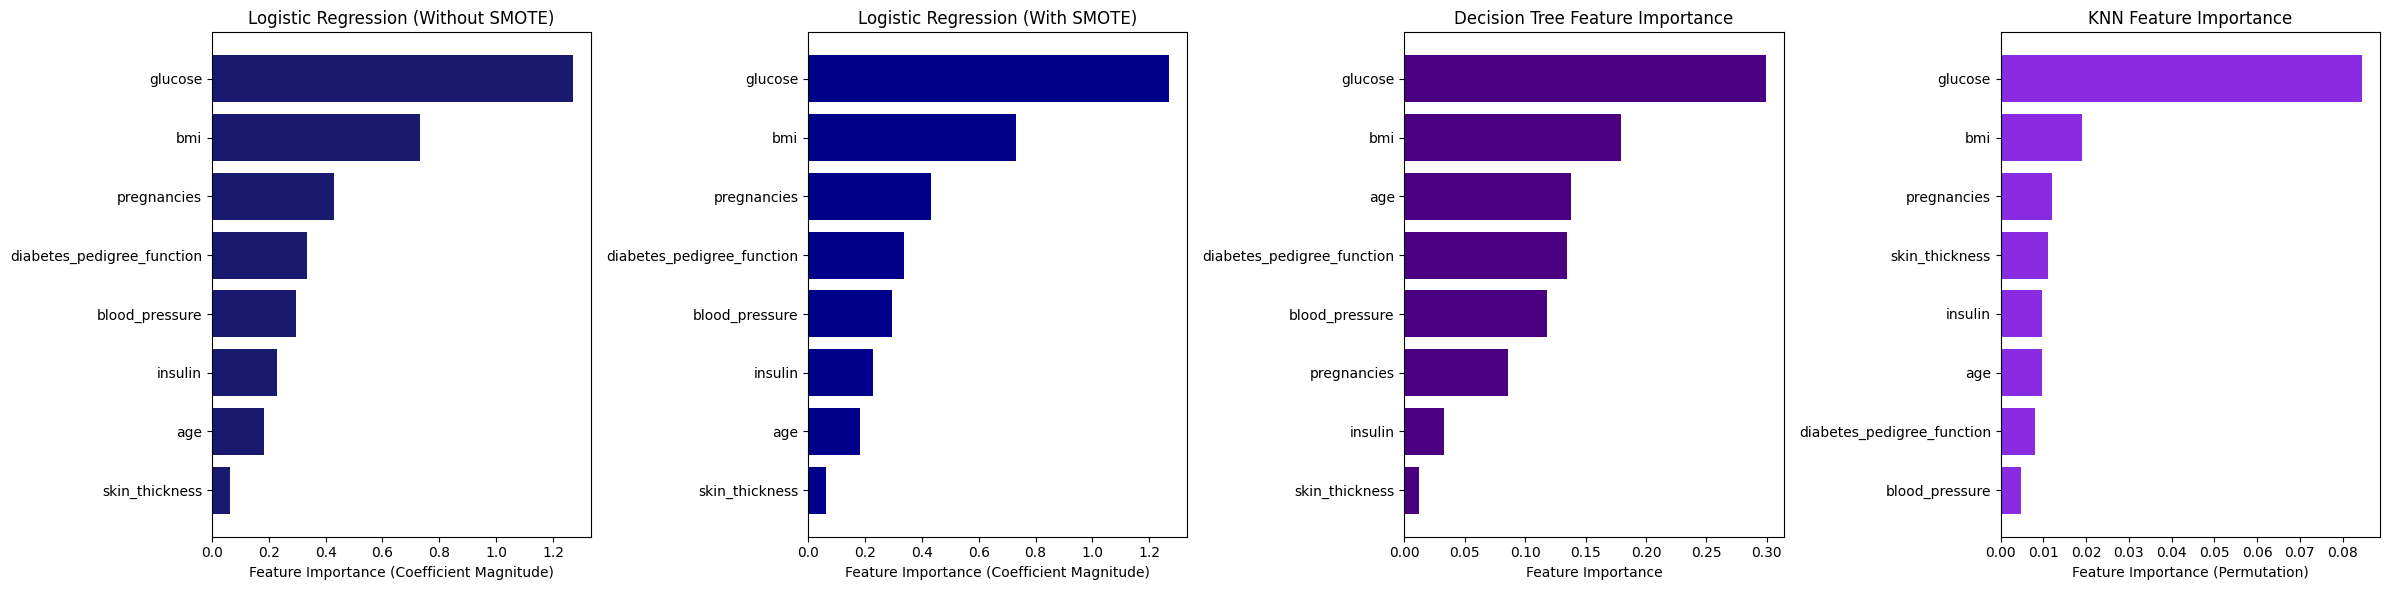

In [ ]:
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE


logreg_importance = np.abs(logreg.coef_[0])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
logreg.fit(X_resampled, y_resampled)
logreg_importance = np.abs(logreg.coef_[0])

tree_importance = clf.feature_importances_

knn_perm_importance = permutation_importance(knn, X, y, n_repeats=10, random_state=42)
knn_importance = knn_perm_importance.importances_mean

logreg_sorted_indices = np.argsort(logreg_importance)
logreg_smote_sorted_indices = np.argsort(logreg_importance)
tree_sorted_indices = np.argsort(tree_importance)
knn_sorted_indices = np.argsort(knn_importance)

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].barh(feature_names[logreg_sorted_indices], logreg_importance[logreg_sorted_indices], color='midnightblue')
axes[0].set_xlabel("Feature Importance (Coefficient Magnitude)")
axes[0].set_title("Logistic Regression (Without SMOTE)")

axes[1].barh(feature_names[logreg_smote_sorted_indices], logreg_importance[logreg_smote_sorted_indices], color='darkblue')
axes[1].set_xlabel("Feature Importance (Coefficient Magnitude)")
axes[1].set_title("Logistic Regression (With SMOTE)")

axes[2].barh(feature_names[tree_sorted_indices], tree_importance[tree_sorted_indices], color='indigo')
axes[2].set_xlabel("Feature Importance")
axes[2].set_title("Decision Tree Feature Importance")


axes[3].barh(feature_names[knn_sorted_indices], knn_importance[knn_sorted_indices], color='blueviolet')
axes[3].set_xlabel("Feature Importance (Permutation)")
axes[3].set_title("KNN Feature Importance")

plt.tight_layout()
plt.show()


Feature Importance for the different models used for training